In [1]:
import matplotlib.pyplot as plt
import openturns as ot
import pandas as pd 
from copy import copy
import numpy as np 
import os
import re

In [2]:
path = './meta_analysis_results'
metaAnalysisPaths = os.listdir(path)

In [3]:
analysisDataframes = []
for i in range(len(metaAnalysisPaths)):
    sample = ot.Sample_ImportFromCSVFile(os.path.join(path,metaAnalysisPaths[i]))
    df = pd.DataFrame.from_records(sample, columns=sample.getDescription())
    analysisDataframes.append(df)

In [4]:
lhs_params = ['young','scaleYoung','diam','scaleDiam','forcePos','forceNorm', 'nu']
size_lhs = len(metaAnalysisPaths)
lhs_doe = np.zeros((size_lhs, 7))
for i in range(size_lhs):
    lhs_doe[i,...]= re.findall(r"[-+]?\d*\.\d+|\d+", metaAnalysisPaths[i])
lhs_doe_DF = pd.DataFrame.from_records(lhs_doe, columns=lhs_params)

In [27]:
realModel = []
LHS25 = []
LHS50 = []
LHS100 = []
for p in range(len(analysisDataframes)):
    realModel.append(analysisDataframes[p].loc[0])
    LHS25.append(analysisDataframes[p].loc[0])
    LHS50.append(analysisDataframes[p].loc[0])
    LHS100.append(analysisDataframes[p].loc[0])

realModel = pd.DataFrame(realModel)
LHS25 = pd.DataFrame(LHS25)
LHS50 = pd.DataFrame(LHS50)
LHS100 = pd.DataFrame(LHS100)  

realModel.reset_index(inplace=True, drop=True)
LHS25.reset_index(inplace=True, drop=True)
LHS50.reset_index(inplace=True, drop=True)
LHS100.reset_index(inplace=True, drop=True)

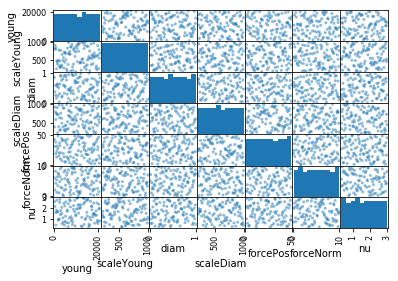

In [28]:
lhs_doe_DF
pd.plotting.scatter_matrix(lhs_doe_DF)
plt.show()

In [29]:
realModel

,meta,N_LHS,size,kl_dimension,N_KL_Young,N_KL_Diam,R2,SI_E,SI_E_lb,SI_E_ub,SI_D,SI_D_lb,SI_D_ub,SI_FP,SI_FP_lb,SI_FP_ub,SI_FN,SI_FN_lb,SI_FN_ub
0,0.0,-1.0,1000.0,169.0,84.0,83.0,-1.0,0.03004,-0.05949,0.12130,0.86924,0.85559,0.88567,-0.00995,-0.09981,0.08495,0.08763,-0.00292,0.18459
1,0.0,-1.0,1000.0,21.0,10.0,9.0,-1.0,0.56852,0.52201,0.61297,0.16823,0.09906,0.22597,-0.00992,-0.08123,0.05950,0.20873,0.14554,0.27109
2,0.0,-1.0,1000.0,18.0,5.0,11.0,-1.0,0.02595,-0.03661,0.09547,0.86280,0.84598,0.88284,-0.01694,-0.07914,0.04932,0.05067,-0.01271,0.11822
3,0.0,-1.0,1000.0,39.0,13.0,24.0,-1.0,0.03367,-0.03299,0.10287,0.85802,0.84101,0.87554,0.03644,-0.03041,0.10657,0.16128,0.09004,0.21699
4,0.0,-1.0,1000.0,14.0,5.0,7.0,-1.0,0.23984,0.17234,0.30973,0.00041,-0.07166,0.06738,0.07483,0.00424,0.14673,0.71081,0.67092,0.74120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,-1.0,1000.0,34.0,12.0,20.0,-1.0,-0.00233,-0.06242,0.05068,0.78389,0.75463,0.81484,-0.05753,-0.11432,-0.00767,0.04567,-0.01548,0.10307
96,0.0,-1.0,1000.0,182.0,91.0,89.0,-1.0,0.11383,0.05237,0.19252,0.23599,0.18230,0.29914,-0.01786,-0.07035,0.04822,0.54137,0.49585,0.57916
97,0.0,-1.0,1000.0,14.0,7.0,5.0,-1.0,0.04677,-0.02052,0.13084,0.93667,0.92514,0.94747,0.03254,-0.03387,0.11318,0.08515,0.01195,0.17123
98,0.0,-1.0,1000.0,13.0,4.0,7.0,-1.0,0.44672,0.39772,0.49731,0.17179,0.10075,0.24012,-0.02734,-0.08393,0.03534,0.29114,0.24203,0.34970


In [30]:
lhs_doe_DF

,young,scaleYoung,diam,scaleDiam,forcePos,forceNorm,nu
0,9640.0,609.0,0.6588,669.0,3.879,7.907,0.416
1,14708.0,256.0,0.0962,260.0,23.808,3.942,2.675
2,15282.0,514.0,0.7901,202.0,6.884,7.575,2.852
3,2211.0,779.0,0.5102,392.0,15.049,7.311,1.002
4,6141.0,833.0,0.0108,528.0,43.035,5.133,1.850
...,...,...,...,...,...,...,...
95,16781.0,943.0,0.6094,523.0,49.397,8.986,0.973
96,12819.0,535.0,0.2010,799.0,45.560,9.708,0.358
97,12217.0,462.0,0.9878,600.0,22.733,8.821,2.306
98,13943.0,910.0,0.1248,347.0,31.958,5.014,2.878


In [31]:
test = copy(lhs_doe_DF)
test['kl_dimension'] = pd.Series(realModel['kl_dimension'])

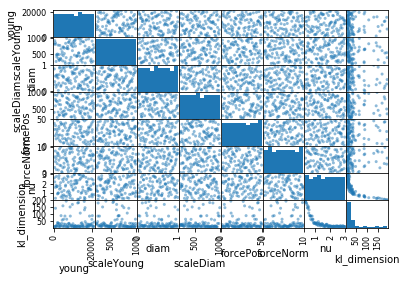

In [32]:
pd.plotting.scatter_matrix(test)
plt.show()

In [26]:
analysisDataframes[0]

,meta,N_LHS,size,kl_dimension,N_KL_Young,N_KL_Diam,R2,SI_E,SI_E_lb,SI_E_ub,SI_D,SI_D_lb,SI_D_ub,SI_FP,SI_FP_lb,SI_FP_ub,SI_FN,SI_FN_lb,SI_FN_ub
0,0.0,-1.0,1000.0,169.0,84.0,83.0,-1.000000,0.030040,-0.059490,0.121300,0.869240,0.855590,0.885670,-0.009950,-0.099810,0.084950,0.087630,-0.002920,0.184590
1,1.0,25.0,50000.0,169.0,84.0,83.0,-0.000011,0.009482,-0.010873,0.075312,0.000506,-0.000401,0.003611,0.000057,-0.000563,0.001723,0.000060,-0.000573,0.001753
2,1.0,50.0,50000.0,169.0,84.0,83.0,-0.000011,0.257496,0.211435,0.316302,0.043276,0.029896,0.055941,0.000611,-0.010308,0.012916,0.000626,-0.010318,0.012979
3,1.0,100.0,50000.0,169.0,84.0,83.0,-0.000011,0.011324,-0.007678,0.040289,0.000148,-0.011713,0.009500,-0.001252,-0.003928,0.000658,-0.001288,-0.003907,0.000551
